# News topic classifier

## Loading the news topics dataset

The news topics dataset consists of a number of Dutch historical newspaper articles that were manually labeled for topic.

In [12]:
import pandas as pd

df_orig = pd.read_csv('news_topics.csv')
df_orig.head()

,url,topic,politics,business,culture,science,sports,crime,disasters,environment,health,education,religion,lifestyle,other,ocr
0,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,(Multi)Media,0,0,1,0,2,0,0,0,0,0,0,0,0,ANDERE AANPAK BIJ ZONDAGSPORT MARATHON nieuw r...
1,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,(Multi)Media,0,0,1,0,0,0,0,0,0,0,0,0,0,Eurovisie-vlucht van Fledermaus Zondag neemt d...
2,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,(Multi)Media,0,0,1,0,0,0,0,0,0,0,0,0,0,Wat wilt u op uw scherm zien in de Oudejaarsna...
3,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,(Multi)Media,0,0,1,0,0,0,0,0,0,0,0,0,0,FILMS VAN DE WEEK In het bloed of in het hoofd...
4,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,(Multi)Media,0,0,2,0,0,0,0,1,2,0,2,0,0,Artis schenkt Blijdorp orang oetang De directi...


In [13]:
df_orig.shape

(1421, 16)

In [14]:
df_sru = pd.read_csv('news_topics_sru.csv')
df_sru.head()

,url,topic,politics,business,culture,science,sports,crime,disasters,environment,health,education,religion,lifestyle,other,ocr
0,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,science,0,0,0,1,0,0,0,0,0,0,0,0,0,– Prof. J. B. Bakema krijgt – Prof. J. B. Bake...
1,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,science,0,0,0,1,0,0,0,0,2,0,0,0,0,morgen Wie is de beste dokter van het land? Da...
2,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,science,2,0,0,1,0,0,0,0,0,0,0,0,0,Brieven bedreigd 15 in De wetenschap dreigt ha...
3,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,science,0,0,0,1,0,0,0,2,2,0,0,0,0,WETENSCHAP & ONDERWIJS G Over de rol van amate...
4,http://resolver.kb.nl/resolve?urn=KBNRC01:0000...,science,0,0,0,1,0,0,0,0,0,0,0,0,0,INHOUD 2 Paul Schnabel over anorexia nervosa: ...


In [15]:
df_sru.shape

(199, 16)

In [16]:
df = pd.concat([df_orig, df_sru])
df.shape

(1620, 16)

In [17]:
df = df.drop(['url', 'topic'], axis=1)
df.head()

,politics,business,culture,science,sports,crime,disasters,environment,health,education,religion,lifestyle,other,ocr
0,0,0,1,0,2,0,0,0,0,0,0,0,0,ANDERE AANPAK BIJ ZONDAGSPORT MARATHON nieuw r...
1,0,0,1,0,0,0,0,0,0,0,0,0,0,Eurovisie-vlucht van Fledermaus Zondag neemt d...
2,0,0,1,0,0,0,0,0,0,0,0,0,0,Wat wilt u op uw scherm zien in de Oudejaarsna...
3,0,0,1,0,0,0,0,0,0,0,0,0,0,FILMS VAN DE WEEK In het bloed of in het hoofd...
4,0,0,2,0,0,0,0,1,2,0,2,0,0,Artis schenkt Blijdorp orang oetang De directi...


## Cleaning and analysing the dataset

### Investigating rows: primary and secondary topic labels

The dataset contains labels for 8 different topics. All examples are expected to have exactly one primary topic, represented by the value 1. One or more secondary topics, represented by the value 2, may be present as well.

In [18]:
topics = ['politics', 'business', 'culture', 'science', 'sports', 'crime', 'disasters', 'environment', 'health',
          'education', 'religion', 'lifestyle', 'other']

df['sum_0'] = (df[topics] == 0).sum(axis=1)
df['sum_1'] = (df[topics] == 1).sum(axis=1)
df['sum_2'] = (df[topics] == 2).sum(axis=1)

df.head(10)

,politics,business,culture,science,sports,crime,disasters,environment,health,education,religion,lifestyle,other,ocr,sum_0,sum_1,sum_2
0,0,0,1,0,2,0,0,0,0,0,0,0,0,ANDERE AANPAK BIJ ZONDAGSPORT MARATHON nieuw r...,11,1,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,Eurovisie-vlucht van Fledermaus Zondag neemt d...,12,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,Wat wilt u op uw scherm zien in de Oudejaarsna...,12,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,FILMS VAN DE WEEK In het bloed of in het hoofd...,12,1,0
4,0,0,2,0,0,0,0,1,2,0,2,0,0,Artis schenkt Blijdorp orang oetang De directi...,9,1,3
5,0,0,1,0,0,0,0,0,0,0,0,0,0,My Fair Lady kreeg acht Oscars Gisteravond zij...,12,1,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,LUCHTMACHTKAPEL„ TE MILITARISTISCH” Onbehuisde...,12,1,0
7,0,0,1,0,2,2,0,0,2,0,0,0,0,SCHOKKEND NOCH GERUSTSTELLEND KET drie kwartie...,9,1,3
8,0,0,1,0,0,0,0,0,0,0,0,0,0,SQUARZINA'S SCHULD ff 'ANXEER men een spel als...,12,1,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,Goed idee Tj^EN aardig idee lag ten grondslag ...,12,1,0


In [19]:
non_unique = df.loc[df['sum_1'] != 1]
non_unique.shape

(0, 17)

### Investigating colums: number of examples and distribution of topics

In [20]:
df.shape[0]

1620

Count the number of examples where a topic appears as primary topic, as well as the number of examples where it appears at all.

In [21]:
counts = [df.shape[0] - df[t].value_counts()[0] for t in topics]
primary_counts = [df.shape[0] - (df[t].value_counts()[0] + df[t].value_counts()[2]) for t in topics]
data = {'topic': topics, 'any': counts, 'primary': primary_counts}
counts = pd.DataFrame(data=data)
counts

,any,primary,topic
0,705,388,politics
1,549,347,business
2,355,266,culture
3,306,181,science
4,165,146,sports
5,210,97,crime
6,68,41,disasters
7,68,18,environment
8,77,23,health
9,43,14,education


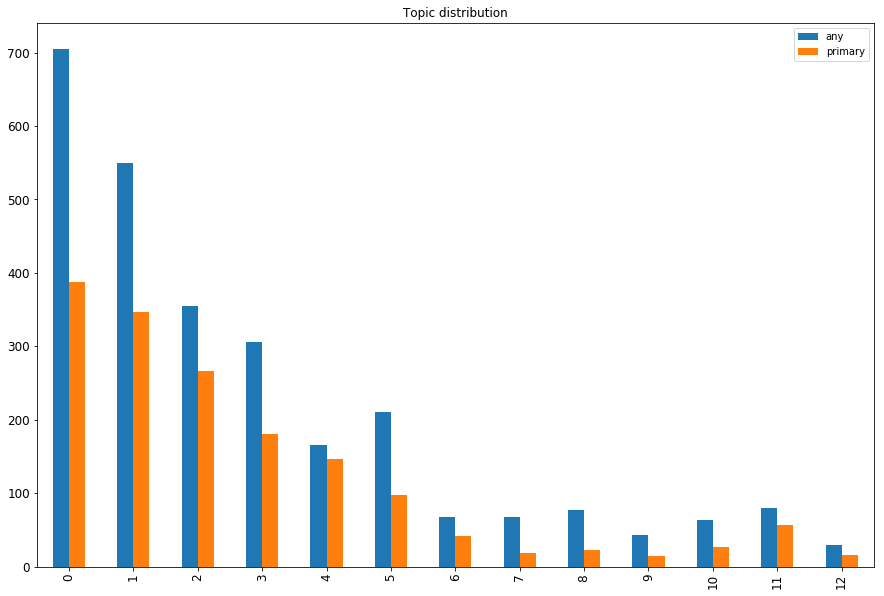

In [23]:
import matplotlib.pyplot as plt

ax = counts[['any','primary']].plot(kind='bar', title ="Topic distribution",
                                    figsize=(15, 10), legend=True, fontsize=12)
plt.show()

## Training classifier

Set all positive values to 1 in order to perform multilabel classification with sklearn.

In [24]:
df[topics].as_matrix()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
df[topics] = df[topics].replace(to_replace=2, value=1)
df[topics].as_matrix()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
from sklearn.model_selection import train_test_split

topics = ['politics', 'business', 'culture', 'science', 'sports']

X_train, X_test, y_train, y_test = train_test_split(df['ocr'], df[topics].as_matrix(), random_state=0)

In [27]:
X_train.shape, y_train.shape

((1215,), (1215, 5))

In [28]:
X_test.shape, y_test.shape

((405,), (405, 5))

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(2,5), analyzer='char_wb', max_features=10000)
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

len(count_vect.vocabulary_.keys())

10000

In [30]:
from sklearn.externals import joblib
joblib.dump(count_vect, 'news_topics_nl_vct.pkl') 

['news_topics_nl_vct.pkl']

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC(probability=True, kernel='linear', class_weight='balanced', C=1.0, verbose=True))
clf.fit(X_train_counts, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True),
          n_jobs=1)

In [32]:
clf.classes_

array([0, 1, 2, 3, 4])

In [33]:
clf.multilabel_

True

In [34]:
joblib.dump(clf, 'news_topics_nl_clf.pkl') 

['news_topics_nl_clf.pkl']

## Testing classifier

In [35]:
pred = clf.predict(X_test_counts)
pred

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ..., 
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]])

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.89567067851547966

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.65679012345679011

In [38]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('average precision', precision_score(y_test, pred, average='macro'))
print('average recall', recall_score(y_test, pred, average='macro'))
print('average f1', f1_score(y_test, pred, average='macro'))

average precision 0.895917676365
average recall 0.840344583626
average f1 0.865544695998


In [39]:
scores = {}
scores['precision'] = precision_score(y_test, pred, average=None)
scores['recall'] = recall_score(y_test, pred, average=None)
scores['f1'] = f1_score(y_test, pred, average=None)

pd.DataFrame(data=scores, index=topics)

,f1,precision,recall
politics,0.811989,0.832402,0.792553
business,0.844444,0.904762,0.791667
culture,0.875000,0.833333,0.921053
science,0.845070,0.909091,0.789474
sports,0.951220,1.000000,0.906977


In [40]:
article = '''Minister Romme en partijgenoot Lieftinck van het CDA verlieten gisteren het Binnenhof
        om met de priester in de kerk te gaan praten over de zin en onzin van religieuze geboortebeperking.
        Computer op komst.'''

In [41]:
article_counts = count_vect.transform([article])
clf.predict_proba(article_counts)

array([[ 0.84334204,  0.15235727,  0.01297661,  0.42004227,  0.00939724]])

## Loading DBpedia topics dataset

In [56]:
df_dbp = pd.read_csv('dbp_topics_en.csv')
df_dbp.head()

,url,topic,politics,business,culture,science,sports,crime,disasters,environment,health,education,religion,lifestyle,other,ocr
0,http://dbpedia.org/resource/Robert_Isaac_Dey_Gray,politics / OfficeHolder,1,0,0,0,0,0,0,0,0,0,0,0,0,"Robert Isaac Dey Gray (ca. 1772 – October 8, 1..."
1,http://dbpedia.org/resource/Robert_Kingston_Scott,politics / OfficeHolder,1,0,0,0,0,0,0,0,0,0,0,0,0,"Robert Kingston Scott (July 8, 1826 – August 1..."
2,http://dbpedia.org/resource/Robert_Smith_(judge),politics / OfficeHolder,1,0,0,0,0,0,0,0,0,0,0,0,0,"Robert Smith (December 7, 1858 – March 18, 194..."
3,http://dbpedia.org/resource/Chris_Williamson_(...,politics / OfficeHolder,1,0,0,0,0,0,0,0,0,0,0,0,0,Christopher Williamson (born 16 September 1956...
4,http://dbpedia.org/resource/Barry_Matthews,politics / OfficeHolder,1,0,0,0,0,0,0,0,0,0,0,0,0,Barry Matthews (born 1946) was Chief Executive...


In [57]:
df_dbp.shape

(2488, 16)

## Testing news classifier on DBpedia abstracts

In [43]:
X_test_counts_dbp = count_vect.transform(df_dbp['ocr'])

In [44]:
y_test_dbp = df_dbp[topics].as_matrix()

In [45]:
pred_dbp = clf.predict(X_test_counts_dbp)
pred_dbp

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

In [47]:
scores = {}
scores['precision'] = precision_score(y_test_dbp, pred_dbp, average=None)
scores['recall'] = recall_score(y_test_dbp, pred_dbp, average=None)
scores['f1'] = f1_score(y_test_dbp, pred_dbp, average=None)

pd.DataFrame(data=scores, index=topics)

,f1,precision,recall
politics,0.623288,0.720317,0.549296
business,0.620896,0.712329,0.550265
culture,0.724500,0.689655,0.763052
science,0.365359,0.546559,0.274390
sports,0.783055,0.889213,0.699541


## Training dedicated DBpedia classifier

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_dbp['ocr'], df_dbp[topics].as_matrix(), random_state=0)

count_vect = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(2,5), analyzer='char_wb', max_features=10000)
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

joblib.dump(count_vect, 'dbp_topics_en_vct.pkl')

['dbp_topics_en_vct.pkl']

In [59]:
clf = OneVsRestClassifier(SVC(probability=True, kernel='linear', class_weight='balanced', C=1.0, verbose=True))
clf.fit(X_train_counts, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True),
          n_jobs=1)

In [60]:
clf.multilabel_

True

In [61]:
joblib.dump(clf, 'dbp_topics_en_clf.pkl')

['dbp_topics_en_clf.pkl']

## Testing DBpedia classifier

In [62]:
pred = clf.predict(X_test_counts)
pred

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ..., 
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [63]:
roc_auc_score(y_test, pred)

0.94131160895568589

In [64]:
print('average precision', precision_score(y_test, pred, average='macro'))
print('average recall', recall_score(y_test, pred, average='macro'))
print('average f1', f1_score(y_test, pred, average='macro'))

average precision 0.906162037684
average recall 0.905914571648
average f1 0.905880964537


In [65]:
scores = {}
scores['precision'] = precision_score(y_test, pred, average=None)
scores['recall'] = recall_score(y_test, pred, average=None)
scores['f1'] = f1_score(y_test, pred, average=None)

pd.DataFrame(data=scores, index=topics)

,f1,precision,recall
politics,0.904564,0.893443,0.915966
business,0.887967,0.906780,0.869919
culture,0.858333,0.865546,0.851240
science,0.917910,0.904412,0.931818
sports,0.960630,0.960630,0.960630


## Training a hybrid classifier

In [115]:
df_dbp = df_dbp.drop(['url', 'topic'], axis=1)
df = df.drop(['sum_0', 'sum_1', 'sum_2'], axis=1)
df_comb = pd.concat([df, df_dbp])
df_comb.head()

,politics,business,culture,science,sports,crime,disasters,environment,health,education,religion,lifestyle,other,ocr
0,0,0,1,0,1,0,0,0,0,0,0,0,0,ANDERE AANPAK BIJ ZONDAGSPORT MARATHON nieuw r...
1,0,0,1,0,0,0,0,0,0,0,0,0,0,Eurovisie-vlucht van Fledermaus Zondag neemt d...
2,0,0,1,0,0,0,0,0,0,0,0,0,0,Wat wilt u op uw scherm zien in de Oudejaarsna...
3,0,0,1,0,0,0,0,0,0,0,0,0,0,FILMS VAN DE WEEK In het bloed of in het hoofd...
4,0,0,1,0,0,0,0,1,1,0,1,0,0,Artis schenkt Blijdorp orang oetang De directi...


In [116]:
X_train, X_test, y_train, y_test = train_test_split(df_comb['ocr'], df_comb[topics].as_matrix(), random_state=0)

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

clf = OneVsRestClassifier(SVC(probability=True, kernel='linear', class_weight='balanced', C=1.0))
clf.fit(X_train_counts, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [117]:
pred = clf.predict(X_test_counts)
pred

array([[1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [118]:
roc_auc_score(y_test, pred)

0.9053959023637761

In [119]:
print('average precision', precision_score(y_test, pred, average='macro'))
print('average recall', recall_score(y_test, pred, average='macro'))
print('average f1', f1_score(y_test, pred, average='macro'))

average precision 0.887860341831
average recall 0.850794340135
average f1 0.867873541537


In [120]:
scores = {}
scores['precision'] = precision_score(y_test, pred, average=None)
scores['recall'] = recall_score(y_test, pred, average=None)
scores['f1'] = f1_score(y_test, pred, average=None)

pd.DataFrame(data=scores, index=topics)

,f1,precision,recall
politics,0.876404,0.857143,0.896552
business,0.819512,0.831683,0.807692
culture,0.859016,0.861842,0.856209
science,0.874525,0.898438,0.851852
sports,0.909910,0.990196,0.841667
